In [1]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv(r'data/tweets.csv')

In [3]:
df

Tweet_ID     Author_ID                       time  \
0       1519050869999874049  7.782926e+17  2022-04-26 20:28:44+00:00   
1       1519031561563164672  7.409099e+07  2022-04-26 19:12:01+00:00   
2       1519010032255438849  8.178647e+17  2022-04-26 17:46:28+00:00   
3       1519007609059430400  5.219502e+08  2022-04-26 17:36:50+00:00   
4       1519001110702436352  9.554554e+17  2022-04-26 17:11:01+00:00   
...                     ...           ...                        ...   
365041  1526333423102611462  1.223601e+18  2022-05-16 22:47:00+00:00   
365042  1526333423035375616  1.126635e+18  2022-05-16 22:47:00+00:00   
365043  1526333422972575746  7.882974e+08  2022-05-16 22:47:00+00:00   
365044  1526333422960091137  2.506486e+09  2022-05-16 22:47:00+00:00   
365045  1526333422842560512  3.435282e+08  2022-05-16 22:47:00+00:00   

                                                     text  n_retweets  \
0       RT Majority of students feeling depressed abou...         6.0   
1       Sad to hear VP Harris was tested positive for ...         0.0   
2       How sad that there are still people out there,...         0.0   
3       Sad... Two years after, with WHO estimating th...         0.0   
4       RT Please...anyone here...for a hug or...warm ...         2.0   
...                                                   ...         ...   
365041   RT one of the best photo sequence of blackpink 🥹      3310.0   
365042  RT Critical race theory literally explains why...      3694.0   
365043  RT Just remembered that Steve King shocked man...       393.0   
365044   I love when women help themselves, that's great.         0.0   
365045  RT This was a great episode to record and very...         2.0   

        n_replies  n_likes  n_quotes  n_media  n_photo  ...  \
0             0.0      0.0       0.0      0.0      0.0  ...   
1             0.0      1.0       0.0      0.0      0.0  ...   
2             0.0      2.0       0.0      4.0      4.0  ...   
3             1.0      0.0       0.0      0.0      0.0  ...   
4             0.0      0.0       0.0      0.0      0.0  ...   
...           ...      ...       ...      ...      ...  ...   
365041        0.0      0.0       0.0      1.0      1.0  ...   
365042        0.0      0.0       0.0      0.0      0.0  ...   
365043        0.0      0.0       0.0      0.0      0.0  ...   
365044        0.0      0.0       0.0      0.0      0.0  ...   
365045        0.0      0.0       0.0      0.0      0.0  ...   

                            semantic  n_emojis  n_slang  n_punct  n_tags  \
0           '(sad', 'OR', 'depressed         0        3        5       2   
1           '(sad', 'OR', 'depressed         0        3        1       3   
2           '(sad', 'OR', 'depressed         0        1        5       0   
3           '(sad', 'OR', 'depressed         0        3        8       1   
4           '(sad', 'OR', 'depressed         0        1       11       3   
...                              ...       ...      ...      ...     ...   
365041  amazing fantastic great best         1        3        2       0   
365042  amazing fantastic great best         0        1        2       0   
365043  amazing fantastic great best         0        2        2       0   
365044  amazing fantastic great best         0        1        2       0   
365045  amazing fantastic great best         0        2        2       0   

        n_annot n_links n_words text_length     score  
0             1       0      18         102  0.008710  
1             0       0      23         110  0.000868  
2             1       0      40         239  0.000058  
3             1       0      41         247  0.000475  
4             1       0      17         108  0.000418  
...         ...     ...     ...         ...       ...  
365041        1       0      10          48  1.434971  
365042        1       0      19         124  7.804225  
365043        1       0      23         126  0.542485  
365044        1       0       8          48  0.

In [87]:
palette = sns.color_palette("YlOrBr_r", as_cmap=False)
sns.set_theme(style='darkgrid', palette=palette)

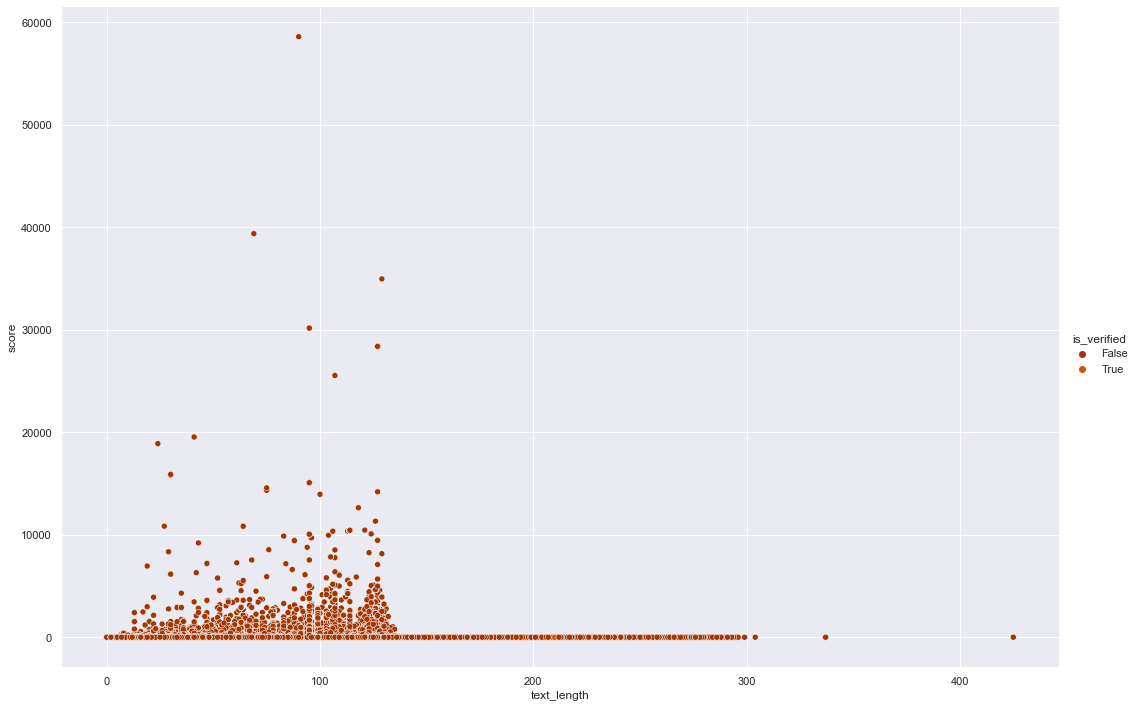

In [8]:
sns.relplot(x='text_length', y='score', data=df, height=10, aspect=15/10, hue='is_verified')

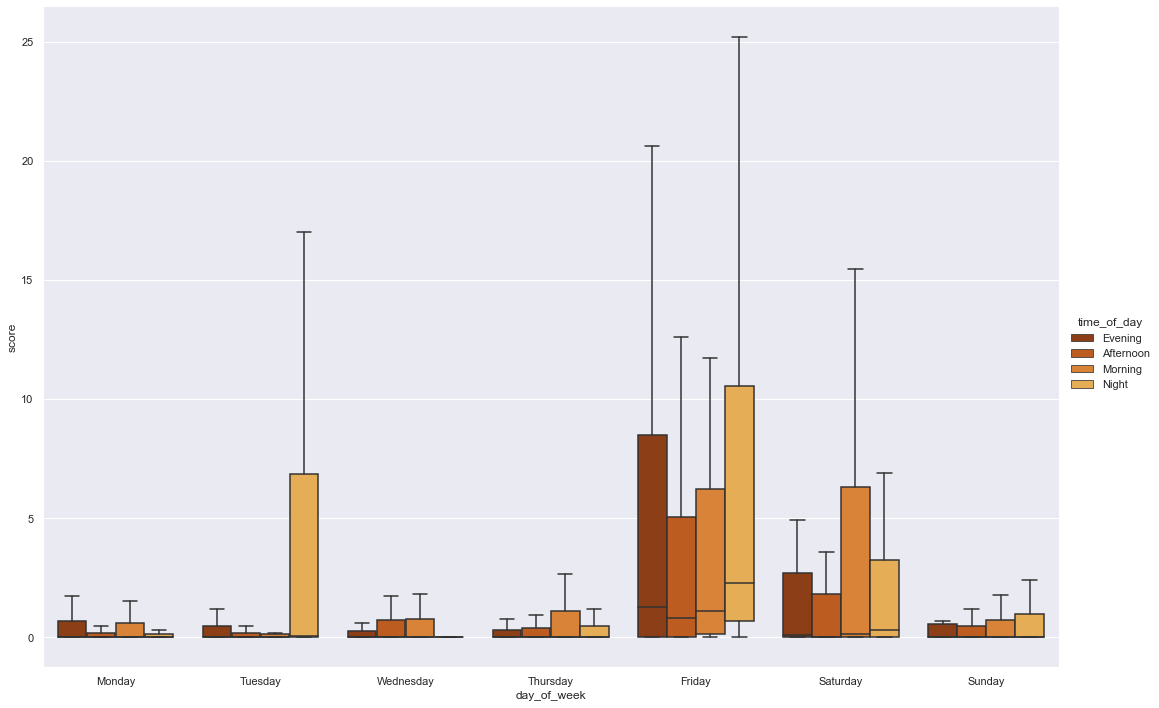

In [9]:
sns.catplot(x='day_of_week', y='score', data=df, height=10, aspect=15/10, hue='time_of_day', kind='box', 
            showfliers=False, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

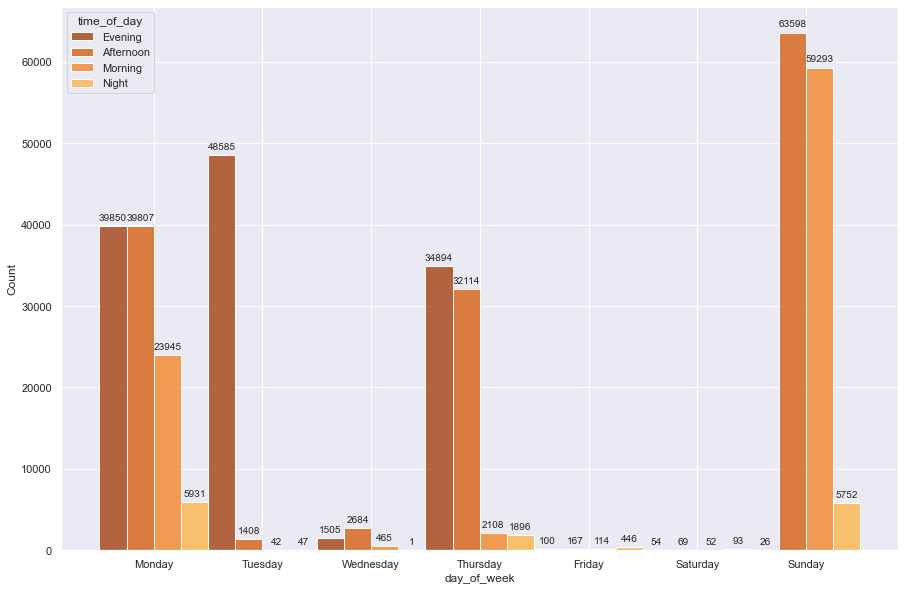

In [10]:
df['day_of_week'] = pd.Categorical(df['day_of_week'], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
fig, ax = plt.subplots(figsize=(15, 10))

hist = sns.histplot(data=df,
                    x='day_of_week',
                    hue='time_of_day',
                    multiple='dodge',
                    ax=ax
                    )

for i, rect in enumerate(ax.patches):
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    label_text = f'{height:.0f}'
    label_x = x + width/2
    label_y = y + height + 1000
    ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)

<AxesSubplot:xlabel='n_gif', ylabel='score'>

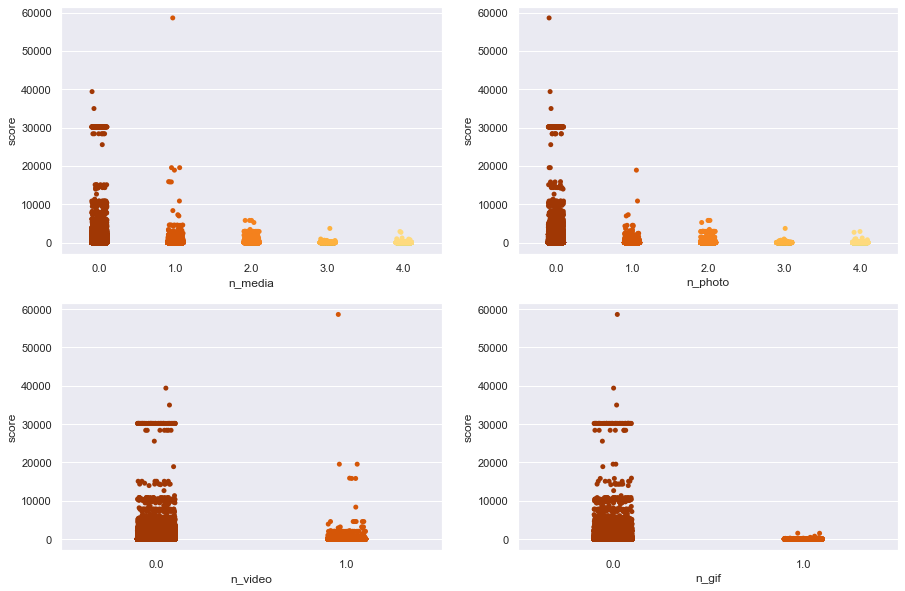

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.stripplot(x='n_media', y='score', data=df, ax=axes[0, 0])
sns.stripplot(x='n_photo', y='score', data=df, ax=axes[0, 1])
sns.stripplot(x='n_video', y='score', data=df, ax=axes[1, 0])
sns.stripplot(x='n_gif', y='score', data=df, ax=axes[1, 1])

In [12]:
df.groupby('n_media')['score'].mean()

n_media
0.0    45.733934
1.0    24.499017
2.0    66.095041
3.0    13.650705
4.0    11.150705
Name: score, dtype: float64

In [13]:
df.groupby('n_media')['score'].count()

n_media
0.0    324676
1.0     33574
2.0      3913
3.0       843
4.0      2040
Name: score, dtype: int64

In [52]:
df['word_per_emoji'] = df[['n_emojis', 'n_words']].apply(lambda x: x[1]/x[0] if x[0] != 0 else np.nan, axis=1)
df['word_per_slang'] = df[['n_slang', 'n_words']].apply(lambda x: x[1]/x[0] if x[0] != 0 else np.nan, axis=1)

<AxesSubplot:xlabel='word_per_slang', ylabel='score'>

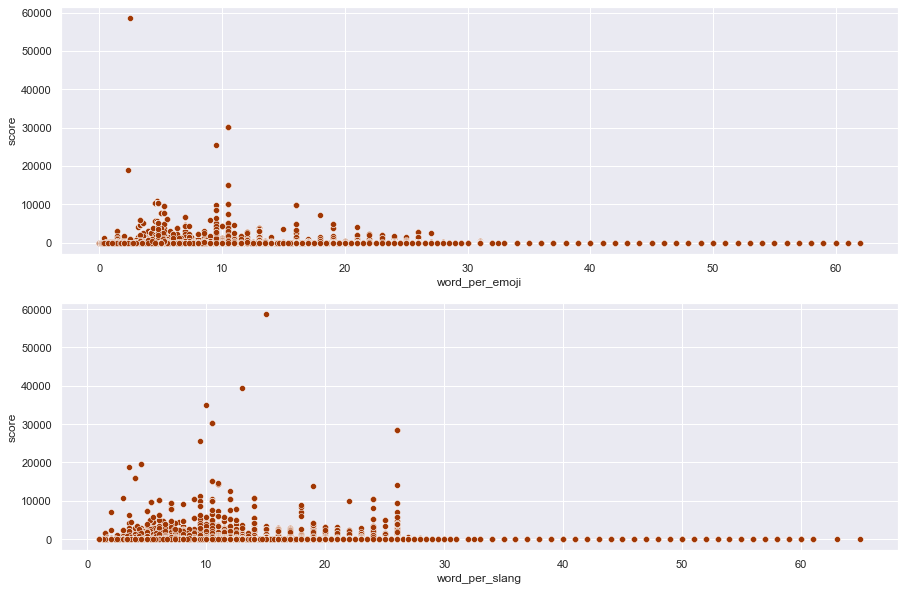

In [53]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

sns.scatterplot(x='word_per_emoji', y='score', data=df, ax=axes[0])
sns.scatterplot(x='word_per_slang', y='score', data=df, ax=axes[1])

In [63]:
df['bins_emoji'] = pd.cut(df['word_per_emoji'], 13)
print(df.groupby('bins_emoji')['score'].mean())
print(df.groupby('bins_emoji')['score'].count())

bins_emoji
(-0.062, 4.769]      84.955801
(4.769, 9.538]      243.230248
(9.538, 14.308]     299.279592
(14.308, 19.077]     29.073380
(19.077, 23.846]     15.333672
(23.846, 28.615]     12.269654
(28.615, 33.385]      1.959853
(33.385, 38.154]      0.016577
(38.154, 42.923]      0.017903
(42.923, 47.692]      0.014900
(47.692, 52.462]      0.015474
(52.462, 57.231]      0.028694
(57.231, 62.0]        0.044877
Name: score, dtype: float64
bins_emoji
(-0.062, 4.769]     19771
(4.769, 9.538]      20161
(9.538, 14.308]     12434
(14.308, 19.077]     7465
(19.077, 23.846]     6048
(23.846, 28.615]     5149
(28.615, 33.385]     1356
(33.385, 38.154]     1005
(38.154, 42.923]      676
(42.923, 47.692]      826
(47.692, 52.462]      728
(52.462, 57.231]      290
(57.231, 62.0]         34
Name: score, dtype: int64


In [64]:
df['bins_slang'] = pd.cut(df['word_per_slang'], 13)
print(df.groupby('bins_slang')['score'].mean())
print(df.groupby('bins_slang')['score'].count())

bins_slang
(0.936, 5.923]      28.017655
(5.923, 10.846]     61.983963
(10.846, 15.769]    86.876677
(15.769, 20.692]    32.375242
(20.692, 25.615]    34.043999
(25.615, 30.538]    73.376340
(30.538, 35.462]     0.020421
(35.462, 40.385]     0.018862
(40.385, 45.308]     0.020165
(45.308, 50.231]     0.019552
(50.231, 55.154]     0.036521
(55.154, 60.077]     0.032907
(60.077, 65.0]       0.025460
Name: score, dtype: float64
bins_slang
(0.936, 5.923]       40052
(5.923, 10.846]     105549
(10.846, 15.769]     63596
(15.769, 20.692]     34762
(20.692, 25.615]     29939
(25.615, 30.538]      8565
(30.538, 35.462]      3041
(35.462, 40.385]      2289
(40.385, 45.308]      2050
(45.308, 50.231]      1533
(50.231, 55.154]       601
(55.154, 60.077]        71
(60.077, 65.0]           5
Name: score, dtype: int64


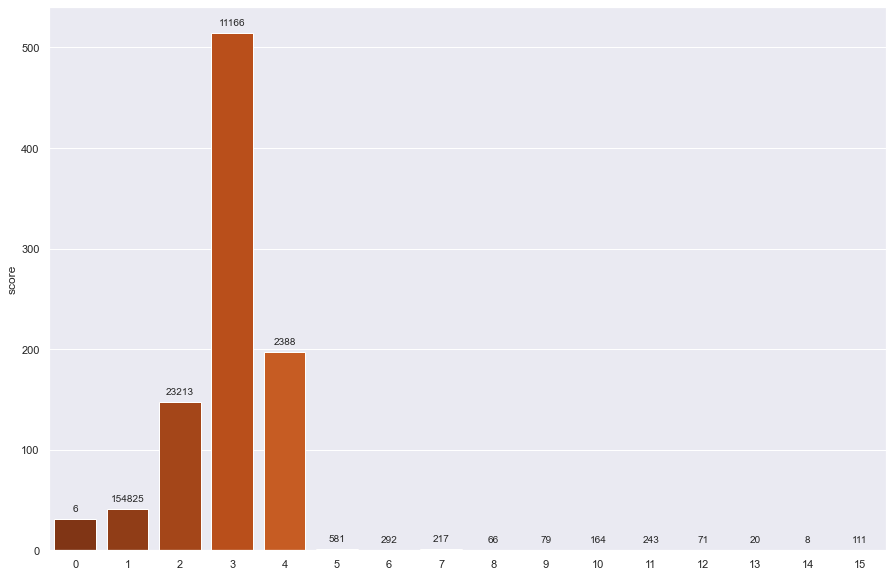

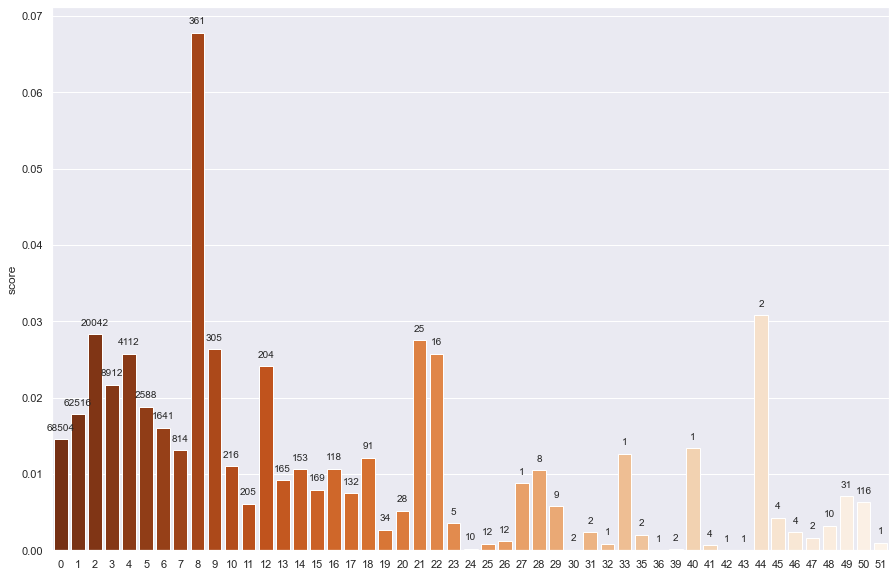

In [127]:
fig, axes = plt.subplots(1, 1, figsize=(15, 10))
sns.barplot(x=sorted(df[df['is_retweet']]['n_annot'].unique()), y=df[df['is_retweet']].groupby('n_annot')['score'].mean(), ax=axes, palette='Oranges_r')
for i, rect in enumerate(axes.patches):
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    label_text = f"{df[df['is_retweet']].groupby('n_annot')['score'].count()[i]}"
    label_x = x + width/2
    label_y = y + height + 10
    axes.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)

fig, axes = plt.subplots(1, 1, figsize=(15, 10))
sns.barplot(x=sorted(df[~df['is_retweet']]['n_annot'].unique()), y=df[~df['is_retweet']].groupby('n_annot')['score'].mean(), ax=axes, palette='Oranges_r')
for i, rect in zip(sorted(df[~df['is_retweet']]['n_annot'].unique()), axes.patches):
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    label_text = f"{df[~df['is_retweet']].groupby('n_annot')['score'].count()[i]}"
    label_x = x + width/2
    label_y = y + height + 0.0015
    axes.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)


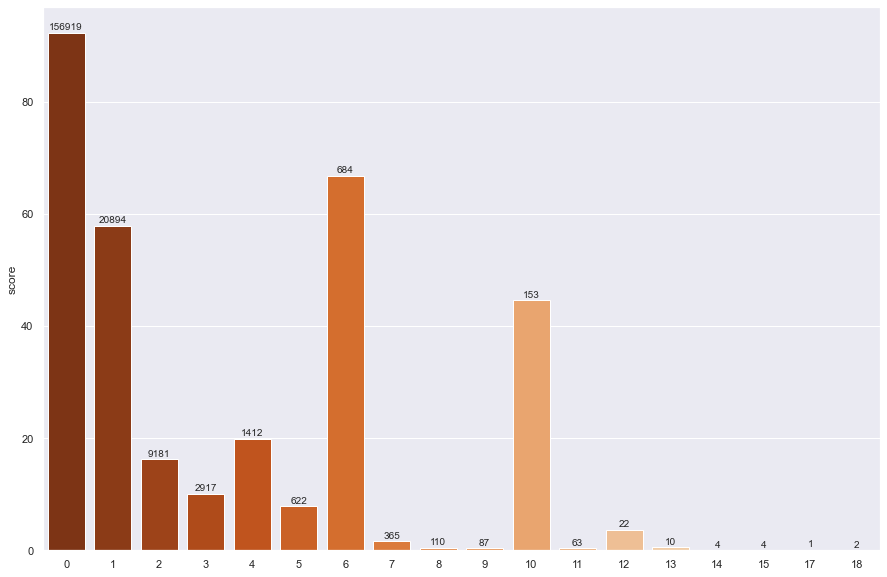

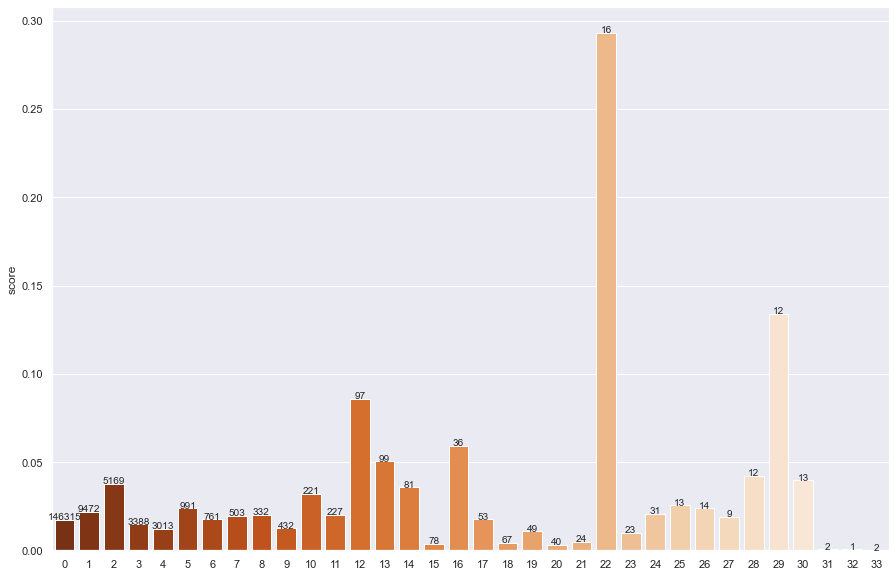

In [134]:
fig, axes = plt.subplots(1, 1, figsize=(15, 10))
sns.barplot(x=sorted(df[df['is_retweet']]['n_tags'].unique()), y=df[df['is_retweet']].groupby('n_tags')['score'].mean(), ax=axes, palette='Oranges_r')
for i, rect in zip(sorted(df[df['is_retweet']]['n_tags'].unique()), axes.patches):
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    label_text = f"{df[df['is_retweet']].groupby('n_tags')['score'].count()[i]}"
    label_x = x + width/2
    label_y = y + height + 1
    axes.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)
    
fig, axes = plt.subplots(1, 1, figsize=(15, 10))
sns.barplot(x=sorted(df[~df['is_retweet']]['n_tags'].unique()), y=df[~df['is_retweet']].groupby('n_tags')['score'].mean(), ax=axes, palette='Oranges_r')
for i, rect in zip(sorted(df[~df['is_retweet']]['n_tags'].unique()), axes.patches):
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    label_text = f"{df[~df['is_retweet']].groupby('n_tags')['score'].count()[i]}"
    label_x = x + width/2
    label_y = y + height + 0.0015
    axes.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)

In [15]:
df['score'][~df['is_retweet']].max()

277.90000000000003

In [11]:
df.groupby('is_verified')['score'].mean()

is_verified
False    44.226794
True      0.016210
Name: score, dtype: float64

In [93]:
df[~df['is_retweet']].groupby('n_annot')['score'].count()

n_annot
0     68504
1     62516
2     20042
3      8912
4      4112
5      2588
6      1641
7       814
8       361
9       305
10      216
11      205
12      204
13      165
14      153
15      169
16      118
17      132
18       91
19       34
20       28
21       25
22       16
23        5
24       10
25       12
26       12
27        1
28        8
29        9
30        2
31        2
32        1
33        1
35        2
36        1
39        2
40        1
41        4
42        1
43        1
44        2
45        4
46        4
47        2
48       10
49       31
50      116
51        1
Name: score, dtype: int64

In [85]:
df[df['is_retweet']]['n_annot'].unique()

array([ 1,  2,  8,  3, 11,  9,  5,  4,  6,  7, 10, 12, 13, 14, 15,  0])

In [26]:
df.groupby('n_annot')['score'].count()

n_annot
0      68510
1     217341
2      43255
3      20078
4       6500
5       3169
6       1933
7       1031
8        427
9        384
10       380
11       448
12       275
13       185
14       161
15       280
16       118
17       132
18        91
19        34
20        28
21        25
22        16
23         5
24        10
25        12
26        12
27         1
28         8
29         9
30         2
31         2
32         1
33         1
35         2
36         1
39         2
40         1
41         4
42         1
43         1
44         2
45         4
46         4
47         2
48        10
49        31
50       116
51         1
Name: score, dtype: int64

In [98]:
for c, v in enumerate(zip([1, 2, 3], [4, 5, 6])):
    print(*v)

1 4
2 5
3 6
